## Trabalho Prático Final - Visualização de dados

Nome: Leonardo Miguel de Sousa Jorge

Matrícula: 2023655620

Professora: Raquel Cardoso de Melo Minardi


In [ ]:
#@title ## Preparação do google drive e conexão do arquivos ao colab

from google.colab import drive
drive.mount('/content/drive')

# Download do banco de dados
!gdown --id 1Yv8-gcuNsUa8qkwP7XGY_CXT93xaXWTc -O "/content/drive/MyDrive/prod_petroleo_gas.xlsx"
# Download da imagem com as bacias sedimentares
!gdown --id 1T7RxWZvimPNvaNdA-4yr-VS7Nlr_DWAz -O "/content/drive/MyDrive/bacias.png"

In [ ]:
#@title ## Instalação dos pacotes necessários

! pip install pandas
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#@title ## Importação dos pacotes utilizados

import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#@title ## Pré-visualização do banco de dados

database = pd.read_excel('/content/drive/MyDrive/prod_petroleo_gas.xlsx')

display(database)

,Boletim,Bacia,Petróleo (bbl/dia),Gás Natural (Mm³/dia)
0,2010-09-01,Campos,1685438,27227
1,2010-09-01,Espírito Santo,70081,6592
2,2010-09-01,Solimões,35618,10317
3,2010-09-01,Potiguar,61393,1901
4,2010-09-01,Recôncavo,43927,3200
...,...,...,...,...
1784,2023-01-01,Amazonas,1319,694
1785,2023-01-01,Sergipe,3710,40
1786,2023-01-01,Tucano Sul,6,116
1787,2023-01-01,Barreirinhas,91,1


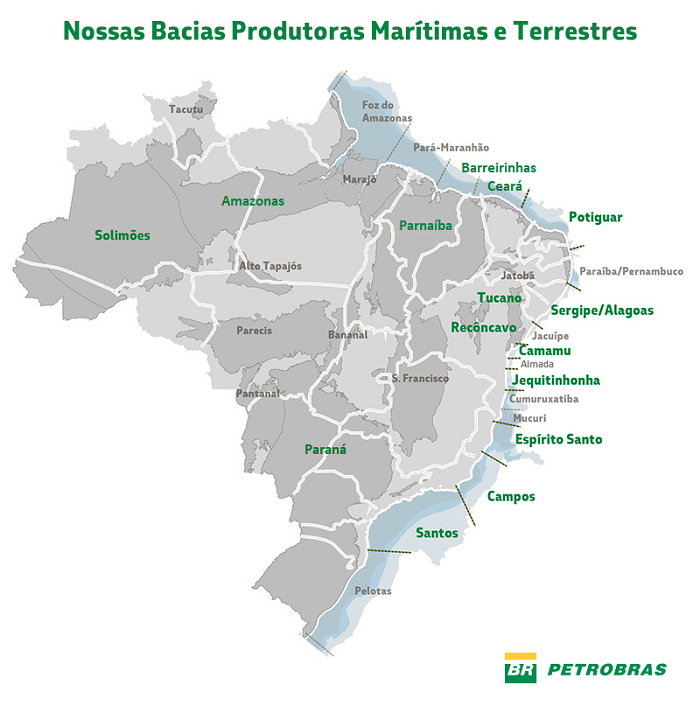

In [ ]:
#@title ## Bacias sedimentares brasileiras - Destaque para as produtoras de petróleo e/ou gás natural

from IPython.display import Image

Image('/content/drive/MyDrive/bacias.png')


In [ ]:
#@title Pré-configurações para os plots

bacias = database["Bacia"].unique()

colors = ['#b90000','#FF1627','#FE8049','#E99B66','#FFCE54','#e8dc6a','#B5E966','#18ed98',
                '#58edeb','#4fb7e0','#355BF7','#9300FF','#c212e6','#FF71C9','#fa11c0']

bacias_order_petro = {}
for bacia in bacias:
    bacias_order_petro[bacia] = [np.median(database.loc[database['Bacia'] == bacia,'Petróleo (bbl/dia)'])]

# Ordenação pelos valores de mediana
bacias_order_petro = dict(sorted(bacias_order_petro.items(), key=lambda x: x[1]))

i = 0
for key, value in bacias_order_petro.items():
    value.append(colors[i])
    i += 1

db_acumulado = database.groupby('Bacia').sum().reset_index()
db_acumulado = db_acumulado.sort_values(by='Petróleo (bbl/dia)')
ordered_colors = [value[1] for key, value in bacias_order_petro.items()]

order_bacias = [key for key, value in bacias_order_petro.items()]


In [ ]:
#@title ## Visualização 1 - Produção acumulada de petróleo e gás no período

graph1 = go.Bar(x=db_acumulado['Bacia'], y=db_acumulado['Petróleo (bbl/dia)'],
                name=bacia,
                marker={'color': ordered_colors})

graph2 = go.Bar(x=db_acumulado['Bacia'], y=db_acumulado['Gás Natural (Mm³/dia)'],
                name=bacia,
                marker={'color': ordered_colors})

layout = go.Layout(title = 'Produção de petróleo e gás natural, por bacia (Set/2010 à Jan/2023)',
                    title_x = 0.5,
                    titlefont = {'family': 'Arial',
                                    'size': 22,
                                    'color': 'black'},
                    showlegend=False,
                    width=900,
                    height=500,
                    paper_bgcolor = 'rgb(243, 243, 243)',
                    plot_bgcolor = 'rgb(243, 243, 243)')

fig = make_subplots(rows=1, cols=2, shared_xaxes=True,
                    subplot_titles=('Petróleo', 'Gás Natural'))

fig.add_trace(graph1, row=1, col=1)
fig.add_trace(graph2, row=1, col=2)

Escala = "Log" #@param ["Linear", "Log"]

if Escala == "Log":
    fig.update_yaxes({'title': 'Produção (barris/dia)',
                'type':'log',
                'exponentformat':'power',
                'range':[0, np.log10(100000000)],
                'autorange': False},
                row=1, col=1)
    fig.update_yaxes({'title': 'Produção (Mm³/dia)',
                            'type':'log',
                            'exponentformat':'power',
                            'range':[0, np.log10(100000000)],
                            'autorange': False},
                            row=1, col=2)

if Escala == "Linear":
    fig.update_yaxes({'title': 'Produção (barris/dia)'},
                    row=1, col=1)
    fig.update_yaxes({'title': 'Produção (Mm³/dia)'},
                    row=1, col=2)

fig.update_layout(layout)
fig.show()


In [ ]:
#@title ## Visualização 2 - Distribuição da produção acumulada de petróleo no período

graphs = []
for bacia, value in bacias_order_petro.items():
    trace = go.Box(y=database.loc[database['Bacia'] == bacia,
                                   'Petróleo (bbl/dia)'],
                   name=bacia,
                   marker={'color': value[1]})
    graphs.append(trace)

Escala = "Log" #@param ["Linear", "Log"]

if Escala == "Log":
    y_option = {'title': 'Produção (barris/dia)',
                'type':'log',
                'exponentformat':'power',
                'range':[0, np.log10(100000000)],
                'autorange': False}

if Escala == "Linear":
    y_option = {'title': 'Produção (barris/dia)'}

layout = go.Layout(title = 'Distribuição da produção de petróleo por bacia (Set/2010 à Jan/2023)',
                    title_x = 0.5,
                    titlefont = {'family': 'Arial',
                                    'size': 22,
                                    'color': 'black'},
                    legend_title='Bacia',
                    xaxis = {'title': 'Bacia'},
                    yaxis = y_option,
                    width=900,
                    height=500,
                    paper_bgcolor = 'rgb(243, 243, 243)',
                    plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=graphs, layout=layout)
fig.show()

In [ ]:
#@title ## Visualização 3 - Série temporal da produção de petróleo no período

graphs = []
for bacia, value in bacias_order_petro.items():
    db = database.loc[database['Bacia'] == bacia]
    trace = go.Scatter(x=db['Boletim'], y=db['Petróleo (bbl/dia)'],
                   name=bacia,
                   mode='lines',
                   marker={'color': value[1]})
    graphs.append(trace)


layout = go.Layout(title = 'Série temporal da produção de petróleo, por bacia (Set/2010 à Jan/2023)',
                    title_x = 0.5,
                    titlefont = {'family': 'Arial',
                                    'size': 22,
                                    'color': 'black'},
                    legend_title='          Bacia',
                    width=900,
                    height=500,
                    paper_bgcolor = 'rgb(243, 243, 243)',
                    plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=graphs, layout=layout)

Escala_Y = "Log" #@param ["Linear", "Log"]

if Escala_Y == "Log":

    fig.update_yaxes({'type':'log',
            'exponentformat':'power',
            'range':[0, np.log10(100000000)],
            'autorange': False})

if Escala_Y == "Linear":
    pass

fig.show()

In [ ]:
#@title ## Visualização 4 - Pequenos múltiplos das séries temporais da produção de petróleo

graphs = []
for bacia, value in bacias_order_petro.items():
    db = database.loc[database['Bacia'] == bacia]
    trace = go.Scatter(x=db['Boletim'], y=db['Petróleo (bbl/dia)'],
                   name=bacia,
                   mode='lines',
                   marker={'color': value[1]})
    graphs.append(trace)


layout = go.Layout(title = 'Série temporal da produção de petróleo, por bacia (Set/2010 à Jan/2023)',
                    title_x = 0.5,
                    titlefont = {'family': 'Arial',
                                    'size': 22,
                                    'color': 'black'},
                    legend_title='          Bacia',
                    width=1200,
                    height=500,
                    paper_bgcolor = 'rgb(243, 243, 243)',
                    plot_bgcolor = 'rgb(243, 243, 243)')


fig = make_subplots(rows=3, cols=5,
                    vertical_spacing=0.1)

i = 0
for row in range(1, 4):
    for col in range(1, 6):
        fig.add_trace(graphs[i], row=row, col=col)
        i += 1


Escala_Y = "Automatica" #@param ["Automatica", "Log"]

if Escala_Y == "Log":
    i = 0
    for row in range(1, 4):
        for col in range(1, 6):
            fig.update_yaxes({'type':'log',
                'exponentformat':'power',
                'range':[0, np.log10(100000000)],
                'autorange': False},
                row=row, col=col)
            i += 1

if Escala_Y == "Automatica":
    pass

Escala_X = "Automatica" #@param ["Periodo total (2010-2023)", "Automatica"]

if Escala_X == "Periodo total (2010-2023)":
    i = 0
    for row in range(1, 4):
        for col in range(1, 6):
            fig.update_xaxes({'range':['2010-09-01', '2023-01-01'],
                            'autorange': False},
                            row=row, col=col)
            i += 1

if Escala_X == "Automatica":
    pass


fig.update_layout(layout)


# Adicionando os rótulos dos eixos aos plots centrais
fig.update_xaxes({'title': 'Gás Natural (Mm³/dia)'},
                            row=3, col=3)
fig.update_yaxes({'title': 'Petróleo (barris/dia)'},
                            row=2, col=1)

fig.show()

In [ ]:
#@title ## Visualização 5 - Heatmap da produção acumulada (por ano) de petróleo e gás

db_prod_year = pd.DataFrame()
for year in database['Boletim'].dt.year.unique():
    db_year = database.loc[database['Boletim'].dt.year == year]
    db_bacia = db_year.groupby(['Bacia']).sum().reset_index()
    db_bacia['Year'] = year
    db_prod_year = db_prod_year.append(db_bacia, ignore_index=True)


db_prod_year_ordered = pd.DataFrame()
for bacia in order_bacias:
    db_year_bacia = db_prod_year.loc[db_prod_year['Bacia'] == bacia]
    db_prod_year_ordered = db_prod_year_ordered.append(db_year_bacia, ignore_index=True)

graph1 = go.Heatmap(
        x = db_prod_year_ordered['Year'],
        y = db_prod_year_ordered['Bacia'],
        z = np.log10(db_prod_year_ordered['Petróleo (bbl/dia)'].T),
        type = 'heatmap',
        colorscale = 'agsunset',
        reversescale = True,
        colorbar = dict(
            title = 'Produção',
            titleside = 'bottom')
        )

graph2 = go.Heatmap(
        x = db_prod_year_ordered['Year'],
        y = db_prod_year_ordered['Bacia'],
        z = np.log10(db_prod_year_ordered['Gás Natural (Mm³/dia)'].T),
        type = 'heatmap',
        colorscale = 'agsunset',
        reversescale = True)

layout = go.Layout(title = 'Produção de petróleo e gás natural por bacia por ano (2010 à 2023)',
                    title_x = 0.5,
                    titlefont = {'family': 'Arial',
                                    'size': 22,
                                    'color': 'black'},
                    xaxis = {'title': 'Ano'},
                    yaxis = {'title': 'Bacia'},
                    width=800,
                    height=500,
                    paper_bgcolor = 'rgb(243, 243, 243)',
                    plot_bgcolor = 'rgb(243, 243, 243)')

fig = make_subplots(rows=1, cols=2, shared_xaxes=False, shared_yaxes=True,
                    subplot_titles=('Petróleo', 'Gás Natural'),
                    horizontal_spacing=0.05)

fig.add_trace(graph1, row=1, col=1)
fig.add_trace(graph2, row=1, col=2)

fig.update_layout(layout)

texts = ['10<sup>0</sup>', '  ', '  ',
        '10<sup>1</sup>', '  ', '  ',
        '10<sup>2</sup>', '  ', '  ',
        '10<sup>3</sup>', '  ', '  ',
        '10<sup>4</sup>', '  ', '  ',
        '10<sup>5</sup>', '  ', '  ',
        '10<sup>6</sup>', '  ', '  ',
        '10<sup>7</sup>', '  ', '  ']

for index, text in enumerate(texts):
    fig.add_annotation(
        text=text,
        font=dict(color='black', size=12),
        showarrow=False,
        align='left',
        xref='paper',
        yref='paper',
        x=1.09,
        y=0.048 + index * 0.042,
        bgcolor='rgba(243, 243, 243, 1)',
        xanchor='left',
        yanchor='middle'
    )


fig.update_xaxes({'title': 'Ano'},
                row=1, col=2)

fig.show()


In [ ]:
#@title ## Visualização 6 - Correlação entre a produção de petróleo e gás por bacia

graphs = []
for bacia, value in bacias_order_petro.items():
    db = database.loc[database['Bacia'] == bacia]
    trace = go.Scatter(x=db['Gás Natural (Mm³/dia)'], y=db['Petróleo (bbl/dia)'],
                   name=bacia,
                   mode='markers',
                   marker={'color': value[1]})
    graphs.append(trace)

layout = go.Layout(title = 'Produção mensal de petróleo x gás natural, por bacia (Set/2010 à Jan/2023)',
                    title_x = 0.5,
                    titlefont = {'family': 'Arial',
                                    'size': 22,
                                    'color': 'black'},
                    legend_title='          Bacia',
                    width=1200,
                    height=500,
                    paper_bgcolor = 'rgb(243, 243, 243)',
                    plot_bgcolor = 'rgb(243, 243, 243)')


fig = make_subplots(rows=3, cols=5,
                    vertical_spacing=0.1)


i = 0
for row in range(1, 4):
    for col in range(1, 6):
        fig.add_trace(graphs[i], row=row, col=col)
        i += 1


Escala = "Automatica" #@param ["Automatica", "Log (mesmo range)"]

if Escala == "Log (mesmo range)":
    i = 0
    for row in range(1, 4):
        for col in range(1, 6):
            fig.update_yaxes({'type':'log',
                'exponentformat':'power',
                'range':[0, np.log10(100000000)],
                'autorange': False},
                row=row, col=col)

            fig.update_xaxes({'type':'log',
                'exponentformat':'power',
                'range':[0, np.log10(100000)],
                'autorange': False},
                row=row, col=col)

            i += 1

if Escala == "Automatica":
    pass

fig.update_layout(layout)


# Adicionando os rótulos dos eixos aos plots centrais
fig.update_xaxes({'title': 'Gás Natural (Mm³/dia)'},
                            row=3, col=3)
fig.update_yaxes({'title': 'Petróleo (barris/dia)'},
                            row=2, col=1)

fig.show()